## Plot model selection results


In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

### LDA

In [2]:
# coherence
c0 = pd.read_pickle("coherence/co_lda_val0-2.pkl")
c1 = pd.read_pickle("coherence/co_lda_val3-5.pkl")
c2 = pd.read_pickle("coherence/co_lda_val6-7.pkl")
c3 = pd.read_pickle("coherence/co_lda_val8-9.pkl")

# perplexity
p0 = pd.read_pickle("LDA/lda_p0-2.pkl")
p1 = pd.read_pickle("LDA/lda_p3-5.pkl")
p2 = pd.read_pickle("LDA/lda_p6-7.pkl")
p3 = pd.read_pickle("LDA/lda_p8-9.pkl")

# time
t0 = pd.read_pickle("LDA/lda_t0-2.pkl")
t1 = pd.read_pickle("LDA/lda_t3-5.pkl")
t2 = pd.read_pickle("LDA/lda_t6-7.pkl")
t3 = pd.read_pickle("LDA/lda_t8-9.pkl")

In [3]:
# fix batch number on coherence 3-5

c1 = c1.rename(columns = {"iteration 0": "iteration 3", "iteration 1": "iteration 4", "iteration 2": "iteration 5"})

In [4]:
# create dataframes

lda_coherence = pd.concat([c0, c1, c2, c3], axis=1)
lda_perplexity = pd.concat([p0, p1, p2, p3], axis=1)
lda_time = pd.concat([t0, t1, t2, t3], axis=1)

### NMF

In [5]:
# coherence
c0 = pd.read_pickle("coherence/co_nmf_val0.pkl")
c1 = pd.read_pickle("coherence/co_nmf_val1.pkl")
c2 = pd.read_pickle("coherence/co_nmf_val2.pkl")
c3 = pd.read_pickle("coherence/co_nmf_val3.pkl")
c4 = pd.read_pickle("coherence/co_nmf_val4.pkl")
c5 = pd.read_pickle("coherence/co_nmf_val5.pkl")
c6 = pd.read_pickle("coherence/co_nmf_val6.pkl")
c7 = pd.read_pickle("coherence/co_nmf_val7.pkl")
c8 = pd.read_pickle("coherence/co_nmf_val8.pkl")
c9 = pd.read_pickle("coherence/co_nmf_val9.pkl")


# time
t0 = pd.read_pickle("NMF/nmf_t0.pkl")
t1 = pd.read_pickle("NMF/nmf_t1.pkl")
t2 = pd.read_pickle("NMF/nmf_t2.pkl")
t3 = pd.read_pickle("NMF/nmf_t3.pkl")
t4 = pd.read_pickle("NMF/nmf_t4.pkl")
t5 = pd.read_pickle("NMF/nmf_t5.pkl")
t6 = pd.read_pickle("NMF/nmf_t6.pkl")
t7 = pd.read_pickle("NMF/nmf_t7.pkl")
t8 = pd.read_pickle("NMF/nmf_t8.pkl")
t9 = pd.read_pickle("NMF/nmf_t9.pkl")

In [6]:
# create dfs

nmf_coherence = pd.concat([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9], axis=1)
nmf_time = pd.concat([t0, t1, t2, t3, t4, t5, t6, t7, t8, t9], axis=1)

### Coherence plot

In [7]:
# Add number of topics as a column for melt

lda_coherence['n_topics']=lda_coherence.index
nmf_coherence['n_topics']=nmf_coherence.index

In [8]:
# change dfs from wide to long format

c_lda_melt=lda_coherence.melt(id_vars='n_topics',value_vars=['iteration {}'.format(i) for i in range(10)],value_name='Coherence' )
c_nmf_melt=nmf_coherence.melt(id_vars='n_topics',value_vars=['iteration {}'.format(i) for i in range(10)],value_name='Coherence' )

c_lda_melt['Model']='LDA'
c_nmf_melt['Model']='NMF'

all_models=pd.concat([c_lda_melt,c_nmf_melt])

In [9]:
all_models

,n_topics,variable,Coherence,Model
0,5,iteration 0,0.516320,LDA
1,10,iteration 0,0.531602,LDA
2,15,iteration 0,0.577059,LDA
3,20,iteration 0,0.588273,LDA
4,25,iteration 0,0.602236,LDA
...,...,...,...,...
295,130,iteration 9,0.701045,NMF
296,140,iteration 9,0.704106,NMF
297,150,iteration 9,0.713437,NMF
298,175,iteration 9,0.706695,NMF


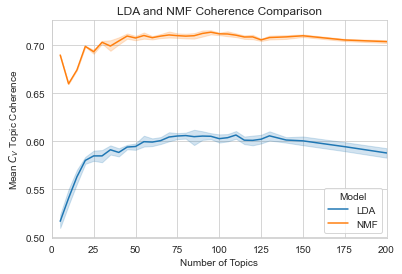

In [10]:
# Coherence plots by number of topics

sns.set_style("whitegrid")
sns.lineplot(x="n_topics", y="Coherence", hue='Model', data=all_models).set(xlim=(0,200))
plt.title("LDA and NMF Coherence Comparison");
plt.xlabel('Number of Topics');
plt.ylabel('Mean $C_{V}$ Topic Coherence');

plt.savefig("coherence_comparison.png", dpi = 800)

### Time plot

In [11]:
# Add number of topics as a column for melt

lda_time['n_topics']=lda_time.index
nmf_time['n_topics']=nmf_time.index

In [12]:
# change dfs from wide to long format

lda_melt=lda_time.melt(id_vars='n_topics',value_vars=['iteration {}'.format(i) for i in range(10)],value_name='Time' )
nmf_melt=nmf_time.melt(id_vars='n_topics',value_vars=['iteration {}'.format(i) for i in range(10)],value_name='Time' )

lda_melt['Model']='LDA'
nmf_melt['Model']='NMF'

all_models=pd.concat([lda_melt,nmf_melt])

In [13]:
# convert to minutes

all_models["Time"] = all_models["Time"]/60

In [14]:
all_models

,n_topics,variable,Time,Model
0,5,iteration 0,4.554285,LDA
1,10,iteration 0,5.271661,LDA
2,15,iteration 0,5.603527,LDA
3,20,iteration 0,5.918412,LDA
4,25,iteration 0,6.441256,LDA
...,...,...,...,...
295,130,iteration 9,85.224953,NMF
296,140,iteration 9,59.224617,NMF
297,150,iteration 9,121.315954,NMF
298,175,iteration 9,168.960859,NMF


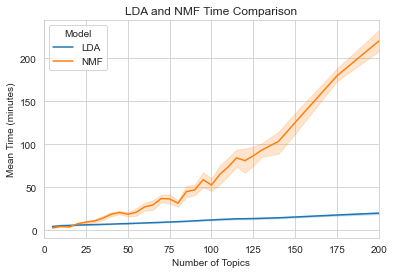

In [15]:
# Time plots by number of topics

sns.set_style("whitegrid")
sns.lineplot(x="n_topics", y="Time", hue='Model', data=all_models).set(xlim=(0,200))
plt.title("LDA and NMF Time Comparison");
plt.xlabel('Number of Topics');
plt.ylabel('Mean Time (minutes)');

plt.savefig("time_comparison.png", dpi = 800)